In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [309]:
dataHosp = pd.read_csv('../data/Hospitales_Normalizados.csv', index_col=0)

In [310]:
X = dataHosp.drop(['HOSPITALIZACION'], axis = 1)
y = dataHosp['HOSPITALIZACION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [311]:
arbol = DecisionTreeClassifier() 

In [312]:
rango_hiperparametros = {"max_depth":[1,2,3,4,5,6,7],
                         "criterion":["gini", "entropy"],
                         "class_weight": [{0: 1, 1: 20}]}

In [313]:
modelo =  GridSearchCV(arbol, param_grid = rango_hiperparametros,cv = 5, verbose = True)

In [314]:
modelo.fit(X,y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 20}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]},
             verbose=True)

In [315]:
modelo.best_params_

{'class_weight': {0: 1, 1: 20}, 'criterion': 'gini', 'max_depth': 3}

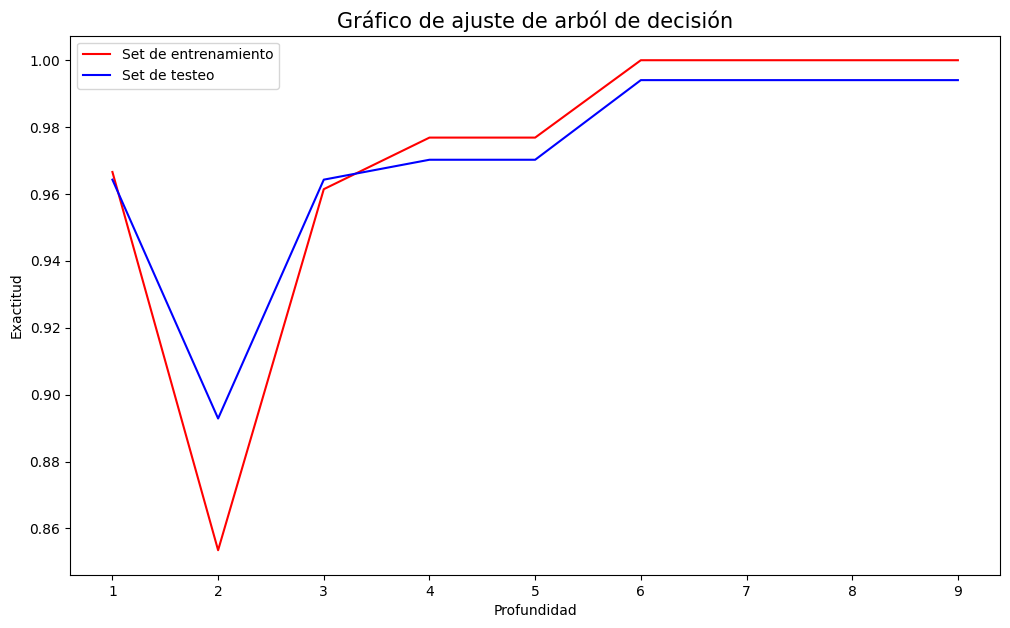

In [316]:
train_prec = []
test_prec = []
max_pairs = list(range(1, 10))

for n in max_pairs:
    clfx = DecisionTreeClassifier(max_depth=n, criterion='gini', class_weight={0: 1, 1: 534/23})
    clfx.fit(X_train, y_train)
    train_prec.append(clfx.score(X_train, y_train))
    test_prec.append(clfx.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_pairs, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_pairs, test_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de arból de decisión', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()    

In [317]:
clf = DecisionTreeClassifier(max_depth = 3, criterion='gini', class_weight={0: 1, 1: 20}) 

In [318]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 20}, max_depth=3)

In [319]:
y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

In [320]:
#Para crear la matriz de confusión


matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

#Para visualizar


cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

#para obtener el valor de precisión, recall, F1-score y soporte para cada clase en un problema de clasificación


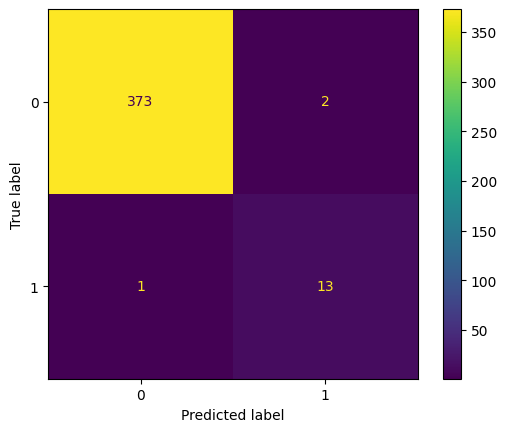

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       1.00      0.99      1.00       375
           1       0.87      0.93      0.90        14

    accuracy                           0.99       389
   macro avg       0.93      0.96      0.95       389
weighted avg       0.99      0.99      0.99       389



In [321]:
cm_display.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_train, y_train_pred)}''')

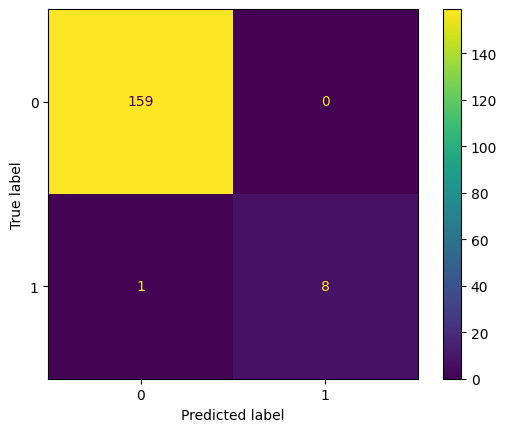

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       0.99      1.00      1.00       159
           1       1.00      0.89      0.94         9

    accuracy                           0.99       168
   macro avg       1.00      0.94      0.97       168
weighted avg       0.99      0.99      0.99       168



In [322]:
cm_display_2.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_test, y_test_pred)}''')

In [323]:
scores_arbol = cross_validate(clf, X, y, cv = 10, verbose = True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [324]:
print(scores_arbol["test_score"])

[0.94642857 0.96428571 1.         1.         0.98214286 1.
 0.98214286 0.98181818 0.98181818 0.96363636]
